# Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.dates as mdates
import csv

In [2]:
def load_prediction_data(d_bond, std, rho, seed):
    results = np.load(f'results/prediction_data/{d_bond}_{std}_{rho}_{seed}.npz')

    train_D = results['train_D']
    test_D = results['test_D']
    train_Y = results['train_Y']
    test_Y = results['test_Y']

    return train_D, test_D, train_Y, test_Y

In [3]:
plt.rcParams['font.size'] = 12

## plot

Text(0, 0.5, 'normalized Z500')

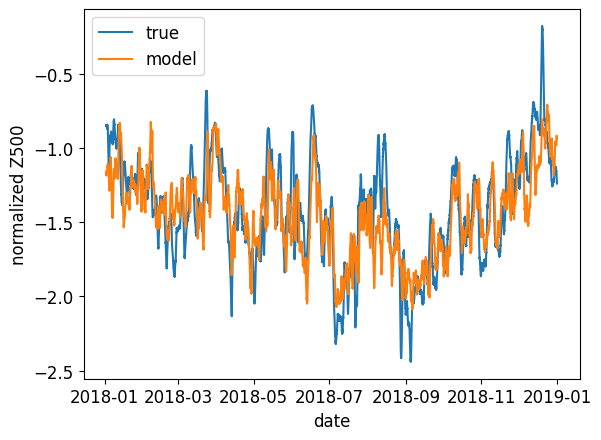

In [4]:
d_bond = 10
std = 0.01
seed = 0
rho = 1.0
train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std, seed=seed, rho=rho)
times = [datetime.datetime(2018, 1, 2, 0) + datetime.timedelta(hours=i) for i in range(len(test_D))]

plt.plot(times, test_D[:, 0], label= 'true')
plt.plot(times, test_Y[:, 0], label = 'model')
plt.legend()

plt.xlabel('date')
plt.ylabel('normalized Z500')

Text(0, 0.5, 'normalized Z500')

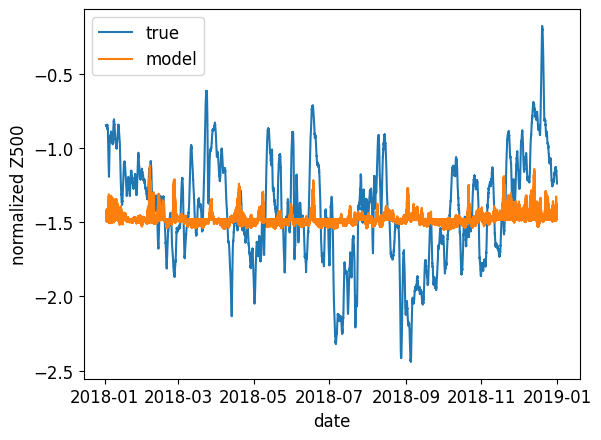

In [5]:
d_bond = 10
std = 0.2
seed = 0
rho = 1.0

train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std, seed=seed, rho=rho)
times = [datetime.datetime(2018, 1, 2, 0) + datetime.timedelta(hours=i) for i in range(len(test_D))]

plt.plot(times, test_D[:, 0], label= 'true')
plt.plot(times, test_Y[:, 0], label = 'model')
plt.legend()

plt.xlabel('date')
plt.ylabel('normalized Z500')

## plot on map

### static plot

In [6]:
def calculate_RMSE(true_data, predict_data):
    rmse = np.sqrt(np.mean((true_data - predict_data) ** 2))
    return rmse


In [7]:
date = datetime.datetime(2018, 2, 1, 0, 0)
index = int((date - datetime.datetime(2018, 1, 2, 0, 0)) / datetime.timedelta(hours=1))

In [8]:
lons = np.linspace(0, 354.375, 64)
lats = np.linspace(-87.1875, 87.1875, 32)

0.0 354.375
-87.1875 87.1875
[-90.  -67.5 -45.  -22.5   0.   22.5  45.   67.5  90. ]
[-180, 180] [-90.0, -90.0]
[-180, 180] [-67.5, -67.5]
[-180, 180] [-45.0, -45.0]
[-180, 180] [-22.5, -22.5]
[-180, 180] [0.0, 0.0]
[-180, 180] [22.5, 22.5]
[-180, 180] [45.0, 45.0]
[-180, 180] [67.5, 67.5]
[-180, 180] [90.0, 90.0]


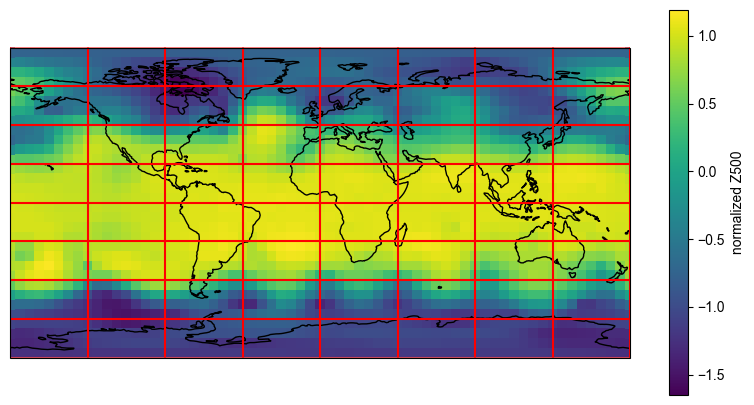

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

d_bond = 10
std = 0.01
seed = 0
rho = 1.0
train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std, seed=seed, rho=rho)


fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

mesh = ax.pcolormesh(lons, lats, test_D.reshape(-1, 32, 64)[index], transform=ccrs.PlateCarree(), shading='auto')

lon_min, lon_max = np.min(lons), np.max(lons)
lat_min, lat_max = np.min(lats), np.max(lats)

print(lon_min, lon_max)
print(lat_min, lat_max)

lon_min, lon_max = -180, 180
lat_min, lat_max = -90, 90

lon_lines = np.linspace(lon_min, lon_max, 9)
for lon in lon_lines:
    ax.plot([lon, lon], [lat_min, lat_max], color='red', transform=ccrs.PlateCarree())

lat_lines = np.linspace(lat_min, lat_max, 9)
print(lat_lines)
for lat in lat_lines:
    print([lon_min, lon_max], [lat, lat])
    ax.plot([lon_min, lon_max], [lat, lat], color='red', transform=ccrs.PlateCarree())

plt.colorbar(mesh, ax=ax, orientation='vertical', label='normalized Z500')

plt.savefig('results/figure_global_rmse.pdf', transparent=True)

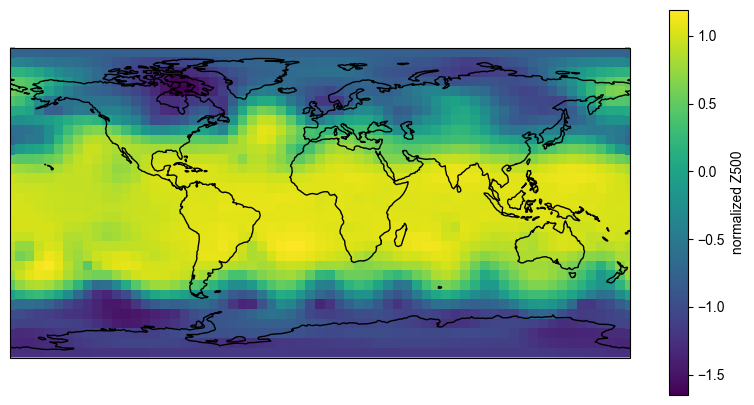

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

d_bond = 10
std = 0.01
seed = 0
rho = 1.0
train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std, seed=seed, rho=rho)

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

mesh = ax.pcolormesh(lons, lats, test_D.reshape(-1, 32, 64)[index], transform=ccrs.PlateCarree(), shading='auto')


plt.colorbar(mesh, ax=ax, orientation='vertical', label='normalized Z500')

plt.show()


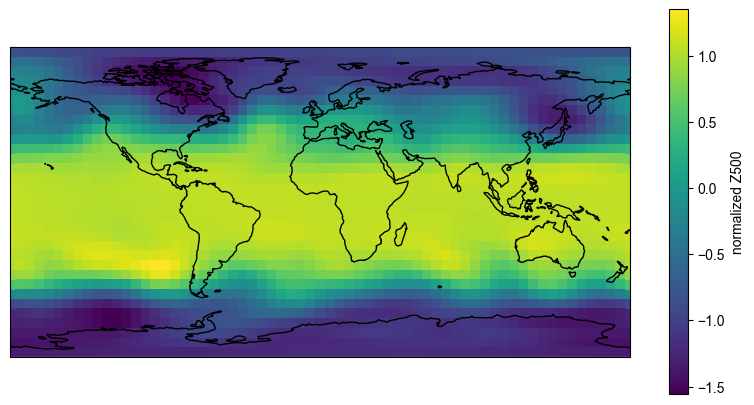

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

d_bond = 10
std = 0.01
seed = 0
rho = 1.0
train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std, seed=seed, rho=rho)


fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

mesh = ax.pcolormesh(lons, lats, test_Y.reshape(-1, 32, 64)[index], transform=ccrs.PlateCarree(), shading='auto')


plt.colorbar(mesh, ax=ax, orientation='vertical', label='normalized Z500')

plt.show()


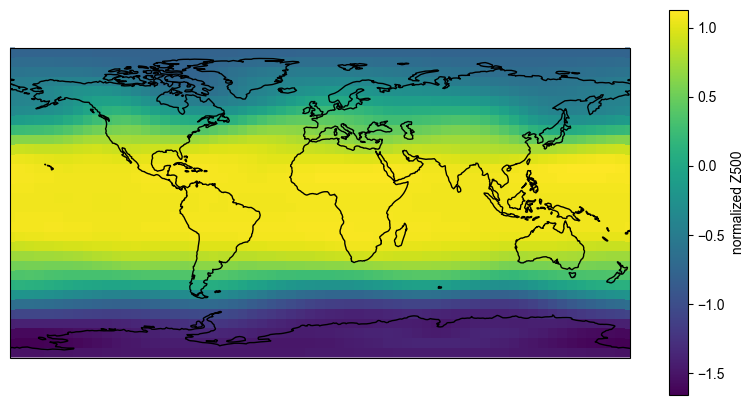

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

d_bond = 10
std = 0.2
seed = 0
rho = 1.0
train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std, seed=seed, rho=rho)


fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

mesh = ax.pcolormesh(lons, lats, test_Y.reshape(-1, 32, 64)[index], transform=ccrs.PlateCarree(), shading='auto')


plt.colorbar(mesh, ax=ax, orientation='vertical', label='normalized Z500')

plt.show()


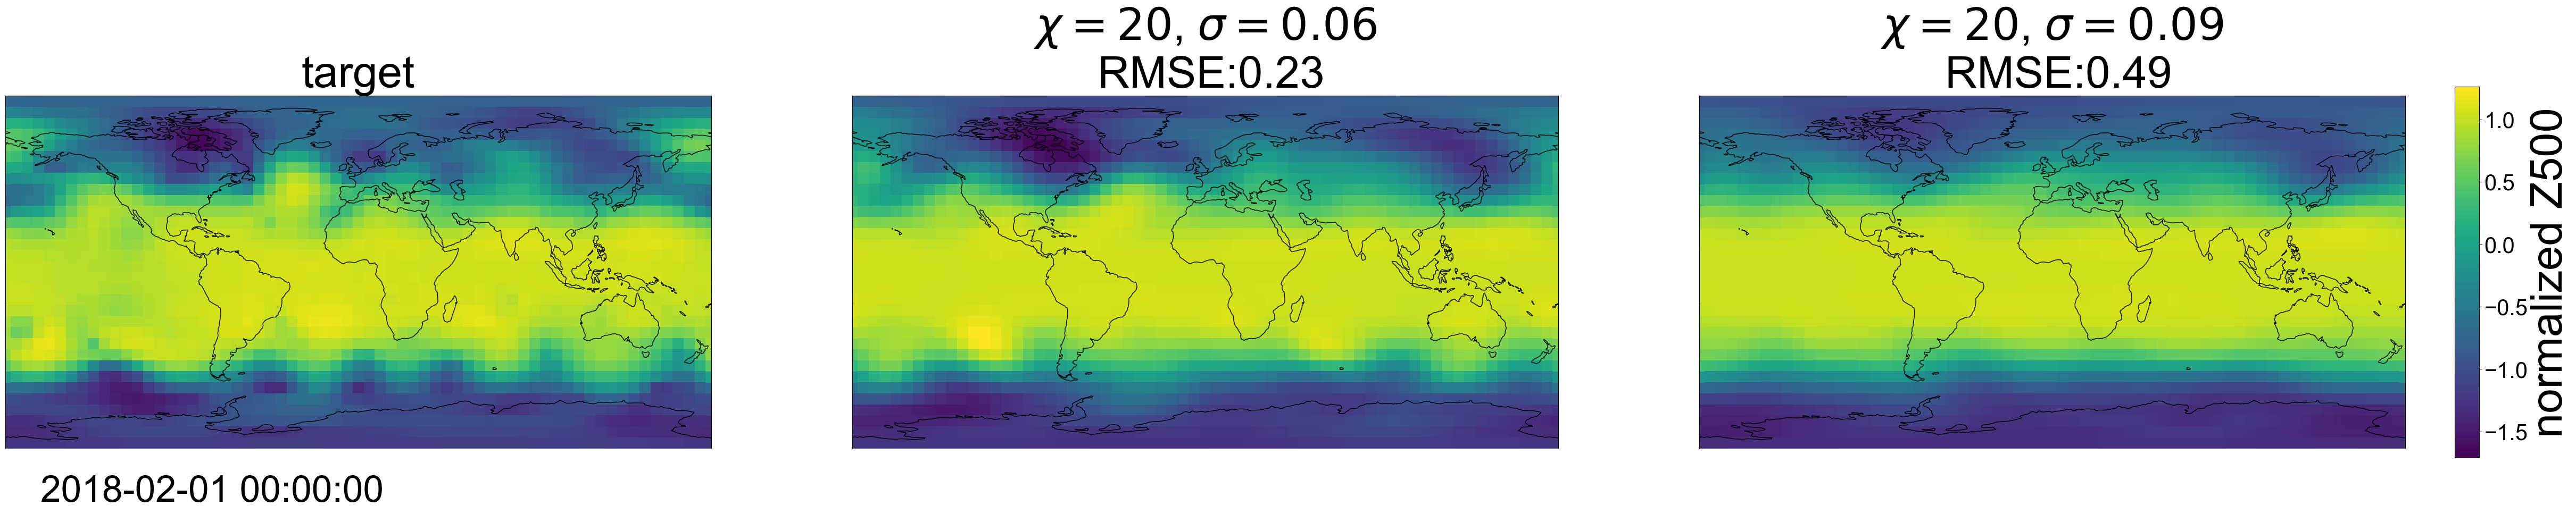

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


d_bond = 20
std = 0.06
seed = 5
rho = 1.0
train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std, seed=seed, rho=rho)

target_data = test_D.reshape(-1, 32, 64)[index]


model1_data = test_Y.reshape(-1, 32, 64)[index]
rmse1 = calculate_RMSE(test_D, test_Y)
model1_name = f'$\chi = {d_bond}$, $\sigma = {std}$'

d_bond = 20
std = 0.09
seed = 0
rho = 1.0
train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std, seed=seed, rho=rho)

model2_data = test_Y.reshape(-1, 32, 64)[index]
rmse2 = calculate_RMSE(test_D, test_Y)
model2_name = f'$\chi = {d_bond}$, $\sigma = {std}$'

vmin = min(target_data.min(), model1_data.min(), model2_data.min())
vmax = max(target_data.max(), model1_data.max(), model2_data.max())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(60, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = [ax1, ax2, ax3]
time_text = ax1.text(0.05, -0.15, times[index], transform=ax1.transAxes, fontsize=50)

titles = ['target', f'{model1_name}\n RMSE:{rmse1:.2f}', f'{model2_name}\n RMSE:{rmse2:.2f}']

for ax, data, title in zip(axes, [target_data, model1_data, model2_data], titles):
    ax.set_global()
    ax.coastlines()
    ax.set_title(title, size=60)

    mesh = ax.pcolormesh(lons, lats, data, transform=ccrs.PlateCarree(), shading='auto', cmap='viridis', vmin=vmin, vmax=vmax)

cbar = fig.colorbar(mesh, ax=axes, orientation='vertical', fraction=0.01, pad=0.02, aspect=15)
cbar.set_label('normalized Z500', size=60)
cbar.ax.tick_params(labelsize=30)

plt.rcParams['font.sans-serif'] = ['Arial']
plt.tick_params(labelsize=50)

plt.savefig('results/figure/z500_compare.pdf')
plt.savefig('results/figure_supp_9_1_b.pdf')

### animation

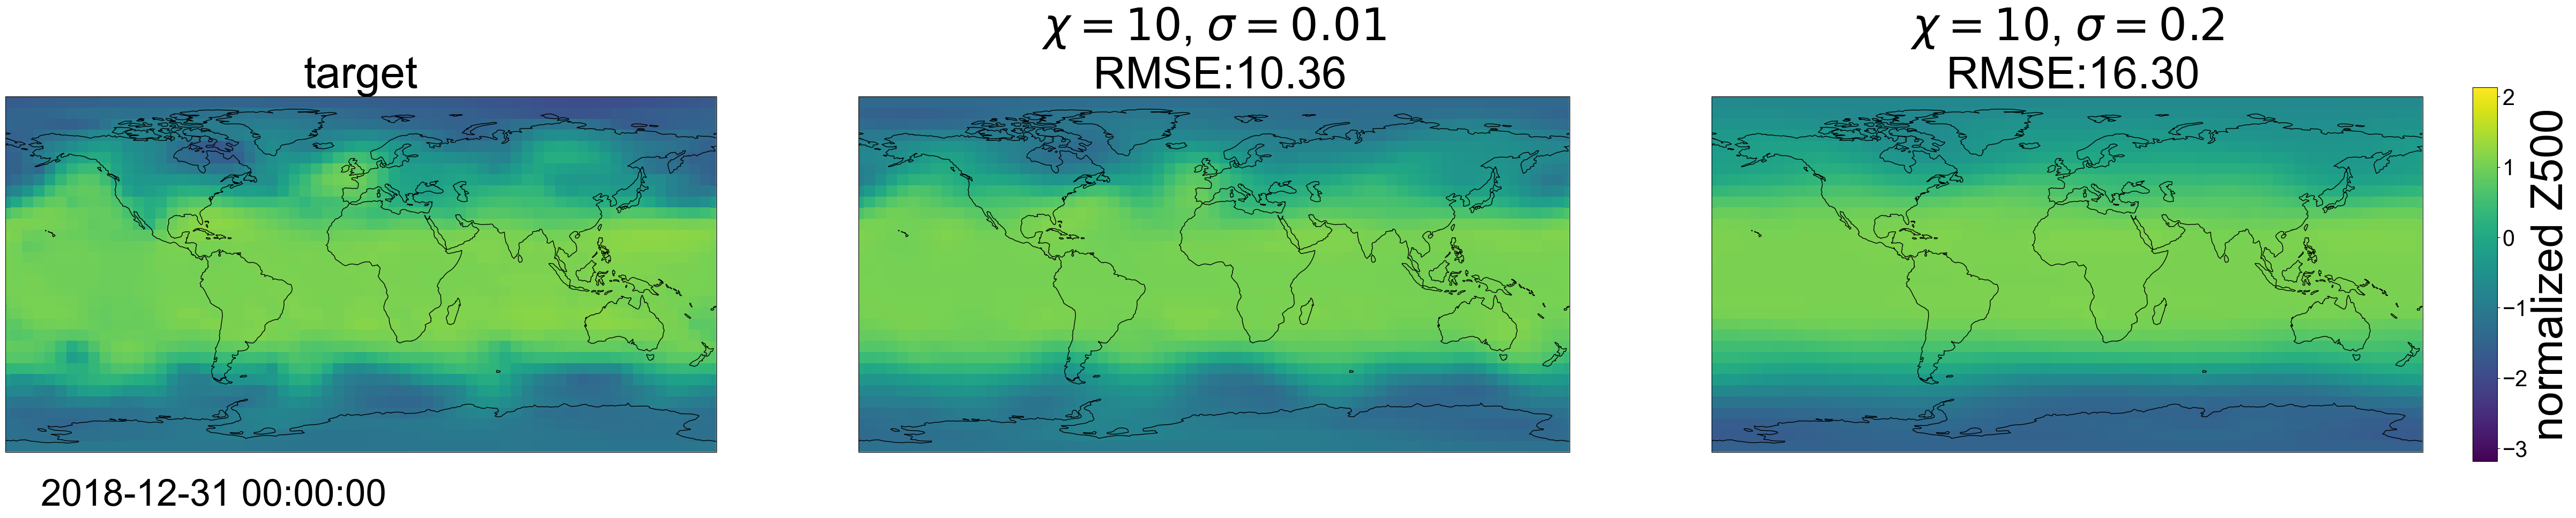

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation

d_bond = 10
std = 0.01
seed = 0
rho = 1.0
train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std, seed=seed, rho=rho)

target_data = test_D.reshape(-1, 32, 64)


model1_data = test_Y.reshape(-1, 32, 64)
rmse1 = calculate_RMSE(test_D, test_Y)
model1_name = f'$\chi = {d_bond}$, $\sigma = {std}$'

d_bond = 10
std = 0.2
seed = 0
rho = 1.0
train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std, seed=seed, rho=rho)

model2_data = test_Y.reshape(-1, 32, 64)
rmse2 = calculate_RMSE(test_D, test_Y)
model2_name = f'$\chi = {d_bond}$, $\sigma = {std}$'

vmin = min(target_data.min(), model1_data.min(), model2_data.min())
vmax = max(target_data.max(), model1_data.max(), model2_data.max())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(60, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = [ax1, ax2, ax3]
time_text = ax1.text(0.05, -0.15, '', transform=ax1.transAxes, fontsize=50)

titles = ['target', f'{model1_name}\n RMSE:{rmse1:.2f}', f'{model2_name}\n RMSE:{rmse2:.2f}']

meshes = []
for ax, title in zip(axes, titles):
    ax.set_global()
    ax.coastlines()
    ax.set_title(title, size=60)
    mesh = ax.pcolormesh(lons, lats, np.zeros((32, 64)), transform=ccrs.PlateCarree(), shading='auto', cmap='viridis', vmin=vmin, vmax=vmax)
    meshes.append(mesh)

cbar = fig.colorbar(mesh, ax=axes, orientation='vertical', fraction=0.01, pad=0.02, aspect=15)
cbar.set_label('normalized Z500', size=60)
cbar.ax.tick_params(labelsize=30)


def init():
    time_text.set_text('')
    return meshes

def update(i):
    for mesh, data in zip(meshes, [target_data, model1_data, model2_data]):
        mesh.set_array(data[i * 24].flatten())
    time_text.set_text(times[i * 24])
    return meshes

ani = FuncAnimation(fig, update, frames=len(target_data) // 24, init_func=init, blit=True)

ani.save('results/figure/z500_animation.gif', writer='pillow', fps=10)


## RMSE

In [4]:
df = pd.read_csv('results/rmse.csv')

In [5]:
df

,d_bond,std,rho,seed,train_rmse,test_rmse,train_mae,test_mae
0,10,0.010,1.0,0,0.189254,0.228838,0.132187,0.160811
1,10,0.020,1.0,0,0.189324,0.228957,0.132239,0.160892
2,10,0.030,1.0,0,0.189229,0.228854,0.132179,0.160810
3,10,0.040,1.0,0,0.188976,0.228553,0.132009,0.160582
4,10,0.050,1.0,0,0.188657,0.228189,0.131792,0.160303
...,...,...,...,...,...,...,...,...
2415,60,0.001,1.0,9,0.191103,0.228013,0.133433,0.160315
2416,70,0.001,1.0,9,0.190509,0.226745,0.133164,0.158940
2417,80,0.001,1.0,9,0.189211,0.227209,0.132046,0.159471
2418,90,0.001,1.0,9,0.190998,0.227572,0.133365,0.160360


In [6]:
Q1 = df['train_rmse'].quantile(0.25)
Q3 = df['train_rmse'].quantile(0.75)
IQR = Q3 - Q1

df = df[(Q1 - 1.5*IQR < df['train_rmse']) & (df['train_rmse'] < Q3 + 1.5*IQR)]

Q1 = df['test_rmse'].quantile(0.25)
Q3 = df['test_rmse'].quantile(0.75)
IQR = Q3 - Q1
df = df[(Q1 - 1.5*IQR < df['test_rmse']) & (df['test_rmse'] < Q3 + 1.5*IQR)]


mean_results = df.groupby(['d_bond', 'std', 'rho']).mean().reset_index()
mean_results['generalization'] = mean_results['test_rmse'] - mean_results['train_rmse']
mean_results

,d_bond,std,rho,seed,train_rmse,test_rmse,train_mae,test_mae,generalization
0,10,0.001,1.0,4.5,0.190453,0.229073,0.132808,0.160563,0.038620
1,10,0.010,1.0,4.5,0.190434,0.229076,0.132797,0.160570,0.038642
2,10,0.020,1.0,4.5,0.190413,0.229092,0.132784,0.160584,0.038679
3,10,0.030,1.0,4.5,0.190398,0.229133,0.132775,0.160610,0.038734
4,10,0.040,1.0,4.5,0.190419,0.229236,0.132790,0.160674,0.038817
...,...,...,...,...,...,...,...,...,...
237,100,0.170,1.0,4.5,0.505215,0.493715,0.402655,0.394294,-0.011500
238,100,0.180,1.0,4.5,0.498446,0.489775,0.396505,0.390254,-0.008671
239,100,0.190,1.0,4.5,0.496496,0.488124,0.395872,0.390011,-0.008372
240,100,0.200,1.0,4.5,0.487909,0.479191,0.388434,0.382092,-0.008719


In [7]:
# load order parameter
save_array = np.load('../order_parameter/results/Order_parameter_64.npz')
X1 = save_array['X']
Y1 = save_array['Y']
MFv64 = save_array['Mfv64']

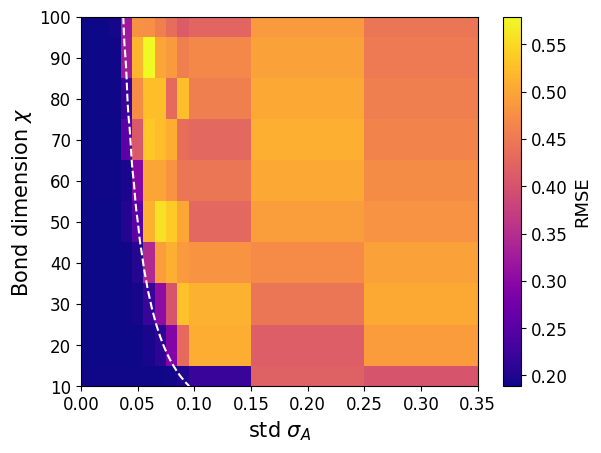

In [8]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),13))
Y=np.zeros((len(bonds),13))
Z=np.zeros((len(bonds),13))
stds=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['train_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig('results/figure/train_rmse.pdf', bbox_inches='tight')

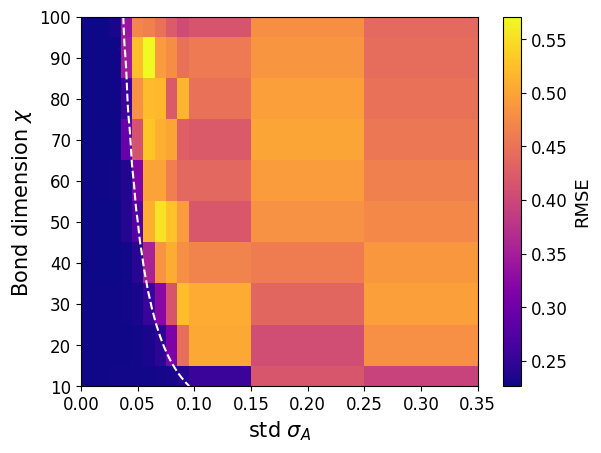

In [ ]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),13))
Y=np.zeros((len(bonds),13))
Z=np.zeros((len(bonds),13))
stds=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['test_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig('results/figure/test_rmse.pdf', bbox_inches='tight')
plt.savefig('results/figure/figure_6_c.pdf', bbox_inches='tight')

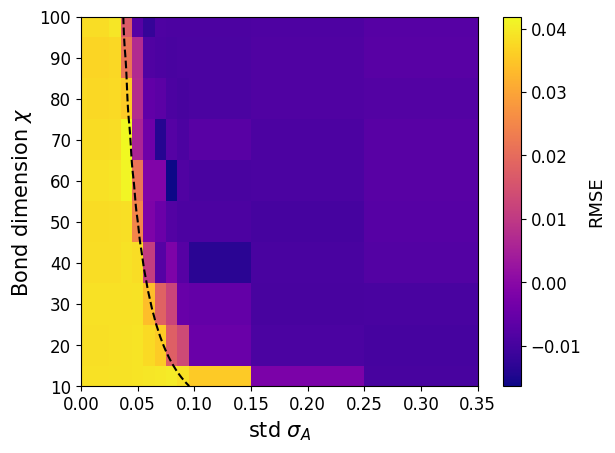

In [10]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),13))
Y=np.zeros((len(bonds),13))
Z=np.zeros((len(bonds),13))
stds=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    valid_time = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['generalization']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=valid_time[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='black')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig('results/figure/generalization_rmse.pdf', bbox_inches='tight')

## compare with ESN

In [9]:
def calculate_RMSE(true_data, predict_data):
    rmse = np.sqrt(np.mean((true_data - predict_data) ** 2))
    return rmse

def calculate_MAE(true_data, predict_data):
    mae = np.mean(np.abs(true_data - predict_data))
    return mae

In [10]:
index = 400
N_x = 64

with open('results/rmse_esn.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['seed', 'test_rmse', 'test_mae'])
    for seed in range(10):
        results = np.load(f'results/esn_prediction_data/optimized_esn_{N_x}_{seed}.npz')

        train_D = results['train_D']
        test_D = results['test_D']
        test_Y = results['test_Y']

        test_rmse = calculate_RMSE(test_D, test_Y)
        test_mae = calculate_MAE(test_D, test_Y)
        writer.writerow([seed, test_rmse, test_mae])

In [11]:
index = 400
N_x = 64

with open('results/rmse_mps.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['seed', 'test_rmse', 'test_mae'])
    for seed in range(10):
        results = np.load(f'results/esn_prediction_data/optimized_mps_{N_x}_{seed}.npz')

        train_D = results['train_D']
        test_D = results['test_D']
        test_Y = results['test_Y']

        test_rmse = calculate_RMSE(test_D, test_Y)
        test_mae = calculate_MAE(test_D, test_Y)
        writer.writerow([seed, test_rmse, test_mae])

In [12]:
df_esn = pd.read_csv('results/rmse_esn.csv')
df_mps = pd.read_csv('results/rmse_mps.csv')

In [13]:
test_rmse_esn = df_esn['test_rmse']
test_rmse_mps = df_mps['test_rmse']

In [28]:
import pickle
with open(f'results/optuna/best_params_mps_{N_x}.pickle', 'rb') as file:
    result_dict = pickle.load(file)

result_dict

{'std': 0.01283284527330849, 'd_bond': 103}

0.22517159821853858
0.22517159821853858


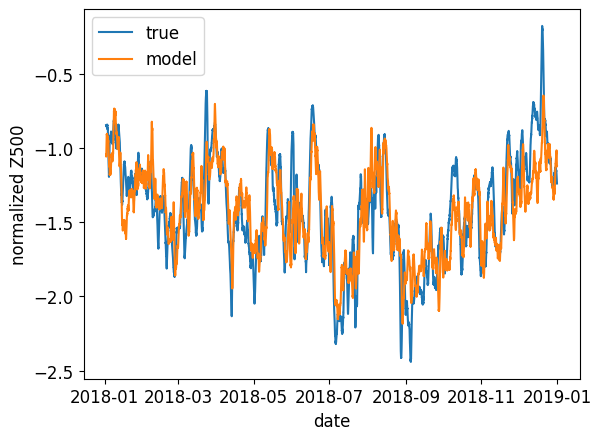

In [15]:
seed = 0
results = np.load(f'results/esn_prediction_data/optimized_esn_{N_x}_{seed}.npz')
train_D = results['train_D']
test_D = results['test_D']
test_Y = results['test_Y']
times = [datetime.datetime(2018, 1, 2, 0) + datetime.timedelta(hours=i) for i in range(len(test_D))]

plt.plot(times, test_D[:, 0], label= 'true')
plt.plot(times, test_Y[:, 0], label = 'model')
plt.legend()

plt.xlabel('date')
plt.ylabel('normalized Z500')

print(np.sqrt(np.mean((test_D - test_Y) ** 2)))
print(calculate_RMSE(test_D, test_Y))

Text(0, 0.5, 'normalized Z500')

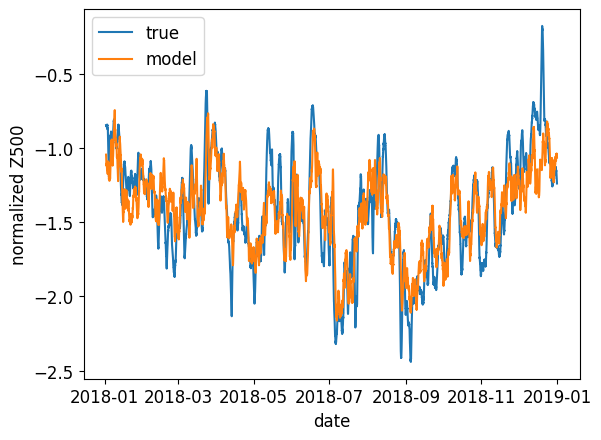

In [16]:
seed = 5
results = np.load(f'results/esn_prediction_data/optimized_esn_{N_x}_{seed}.npz')
train_D = results['train_D']
test_D = results['test_D']
test_Y = results['test_Y']
times = [datetime.datetime(2018, 1, 2, 0) + datetime.timedelta(hours=i) for i in range(len(test_D))]

plt.plot(times, test_D[:, 0], label= 'true')
plt.plot(times, test_Y[:, 0], label = 'model')
plt.legend()

plt.xlabel('date')
plt.ylabel('normalized Z500')

In [17]:
test_rmse_esn

0    0.225172
1    0.221947
2    0.226309
3    0.222175
4    0.224089
5    0.225618
6    0.227086
7    0.231202
8    0.225031
9    0.229857
Name: test_rmse, dtype: float64

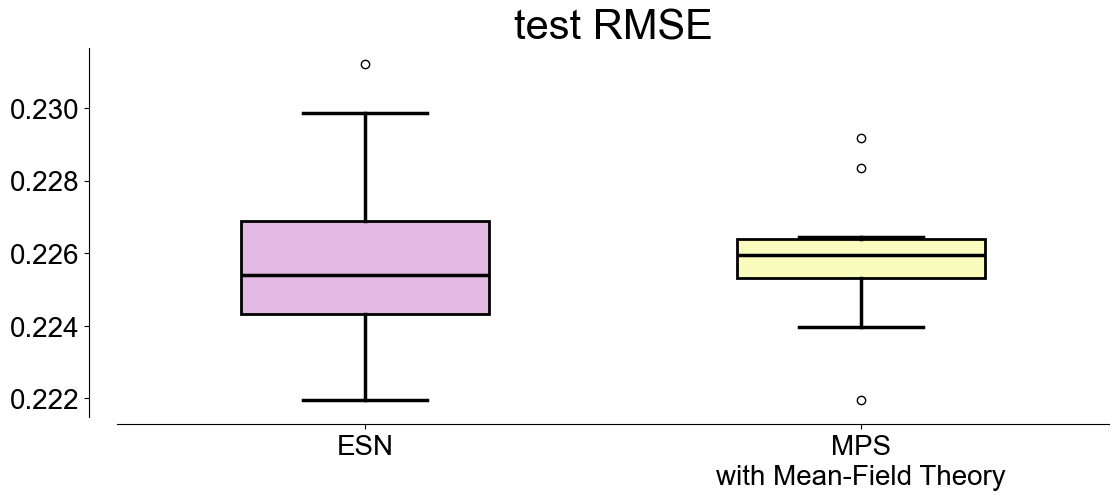

In [ ]:
plt.figure(figsize=(12.8, 4.8))

boxplot_elements = plt.boxplot([test_rmse_esn, test_rmse_mps],
            labels=['ESN', f'MPS\nwith Mean-Field Theory'],
            patch_artist=True,
            widths=0.5,
            boxprops={'linewidth': 2.0},
            medianprops={'linewidth': 2.5, 'color': 'black'},
            whiskerprops={'linewidth': 2.5},
            capprops={'linewidth': 2.5})
colors = ['#9c179e4c', '#f1f5254c']
for patch, color in zip(boxplot_elements['boxes'], colors):
    patch.set_facecolor(color)

plt.title('test RMSE', fontsize=30)


plt.tick_params(labelsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig('results/figure/boxplot-rmse.pdf', bbox_inches='tight')
plt.savefig('results/figure/figure_8_a.pdf', bbox_inches='tight')

In [19]:
from scipy.stats import ranksums
stat, p_value = ranksums(test_rmse_esn, test_rmse_mps, alternative='greater')
print(f"Observed statistic: {stat}")
print(f"P-value: {p_value}")

Observed statistic: -0.30237157840738177
P-value: 0.6188155907650801


In [20]:
import numpy as np
from scipy.stats import permutation_test


def statistic(A, B):
    return np.mean(A) - np.mean(B)

result = permutation_test((test_rmse_esn, test_rmse_mps), statistic, alternative='greater', n_resamples=10000, random_state=42)

print(f"Observed statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")


Observed statistic: -2.714575504242367e-05
P-value: 0.5097490250974902


In [21]:
from scipy.stats import ranksums
stat, p_value = ranksums(test_rmse_esn, test_rmse_mps, alternative='two-sided')
print(f"Observed statistic: {stat}")
print(f"P-value: {p_value}")

Observed statistic: -0.30237157840738177
P-value: 0.7623688184698398


In [22]:
import numpy as np
from scipy.stats import permutation_test


def statistic(A, B):
    return np.mean(A) - np.mean(B)

result = permutation_test((test_rmse_esn, test_rmse_mps), statistic, alternative='two-sided', n_resamples=10000, random_state=42)

print(f"Observed statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

Observed statistic: -2.714575504242367e-05
P-value: 0.9807019298070193


### plot on map

In [23]:
df_esn.loc[df_esn['test_rmse'].idxmax()]

seed         7.000000
test_rmse    0.231202
test_mae     0.162515
Name: 7, dtype: float64

In [24]:
df_mps.loc[df_mps['test_rmse'].idxmax()]

seed         0.000000
test_rmse    0.229166
test_mae     0.160777
Name: 0, dtype: float64

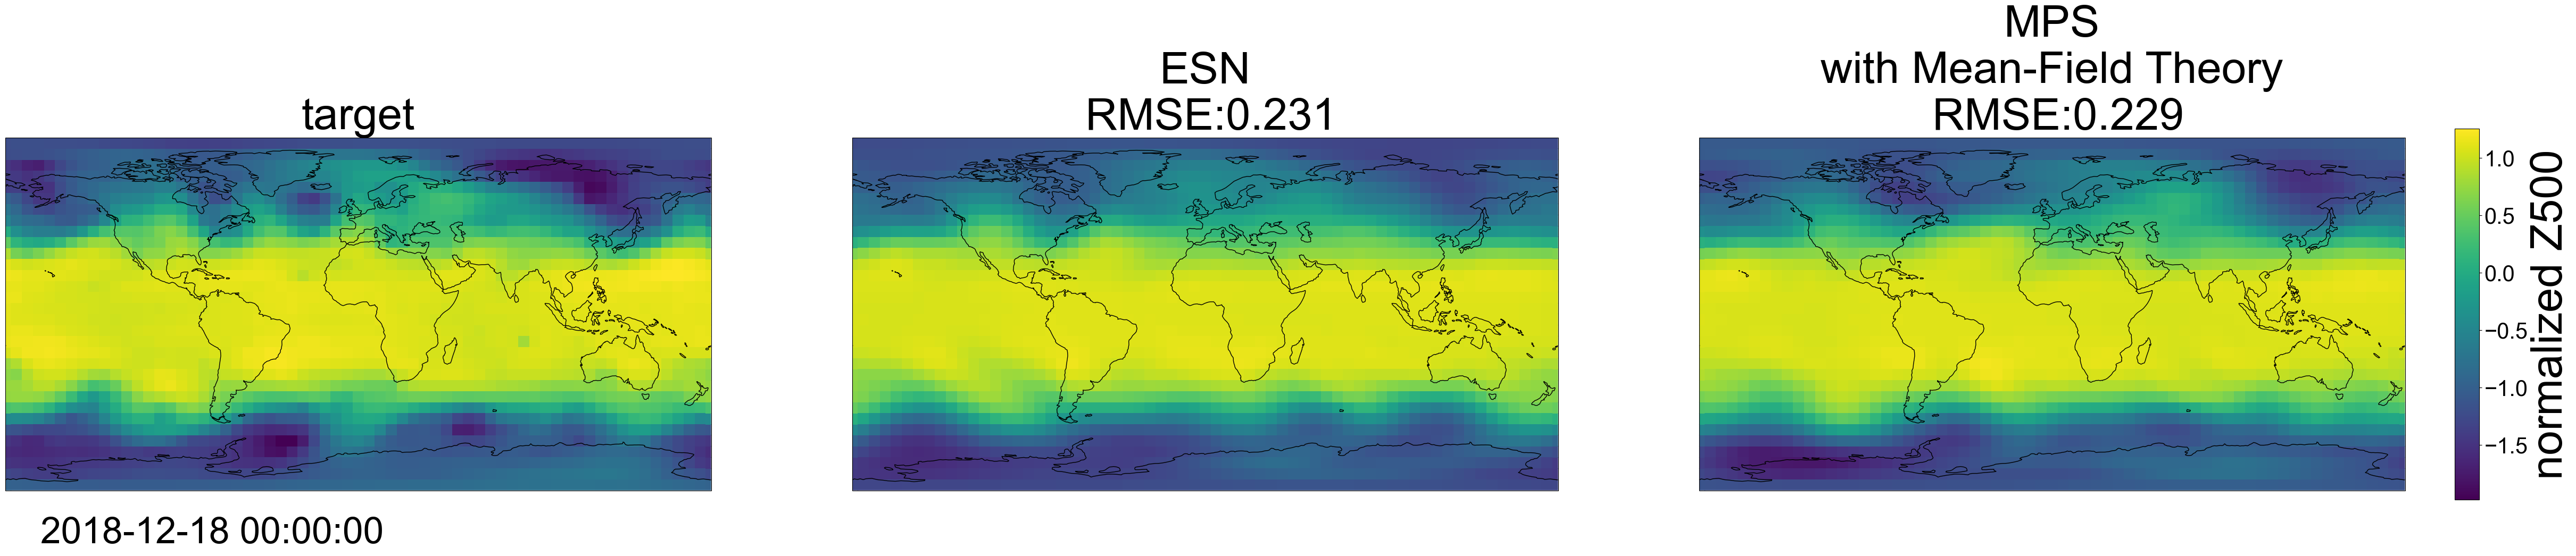

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

date = datetime.datetime(2018, 12, 18, 0, 0)
index = int((date - datetime.datetime(2018, 1, 2, 0, 0)) / datetime.timedelta(hours=1))


seed = 7
results = np.load(f'results/esn_prediction_data/optimized_esn_{N_x}_{seed}.npz')
train_D = results['train_D']
test_D = results['test_D']
test_Y = results['test_Y']
model1_data = test_Y.reshape(-1, 32, 64)[index]
rmse1 = calculate_RMSE(test_D, test_Y)

model1_name = 'ESN'

seed = 0

results = np.load(f'results/esn_prediction_data/optimized_mps_{N_x}_{seed}.npz')

train_D = results['train_D']
test_D = results['test_D']
test_Y = results['test_Y']

target_data = test_D.reshape(-1, 32, 64)[index]

model2_data = test_Y.reshape(-1, 32, 64)[index]
rmse2 = calculate_RMSE(test_D, test_Y)
model2_name = f'MPS\nwith Mean-Field Theory'



vmin = min(target_data.min(), model1_data.min(), model2_data.min())
vmax = max(target_data.max(), model1_data.max(), model2_data.max())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(60, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = [ax1, ax2, ax3]
time_text = ax1.text(0.05, -0.15, times[index], transform=ax1.transAxes, fontsize=50)

titles = ['target', f'{model1_name}\n RMSE:{rmse1:.3f}', f'{model2_name}\n RMSE:{rmse2:.3f}']

for ax, data, title in zip(axes, [target_data, model1_data, model2_data], titles):
    ax.set_global()
    ax.coastlines()
    ax.set_title(title, size=60)

    mesh = ax.pcolormesh(lons, lats, data, transform=ccrs.PlateCarree(), shading='auto', cmap='viridis', vmin=vmin, vmax=vmax)

cbar = fig.colorbar(mesh, ax=axes, orientation='vertical', fraction=0.01, pad=0.02, aspect=15)
cbar.set_label('normalized Z500', size=60)
cbar.ax.tick_params(labelsize=30)

plt.rcParams['font.sans-serif'] = ['Arial']
plt.tick_params(labelsize=50)

plt.savefig('results/figure/z500_compare_esn_mps.pdf', bbox_inches='tight')
plt.savefig('results/figure_8_b.pdf', bbox_inches='tight')